# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

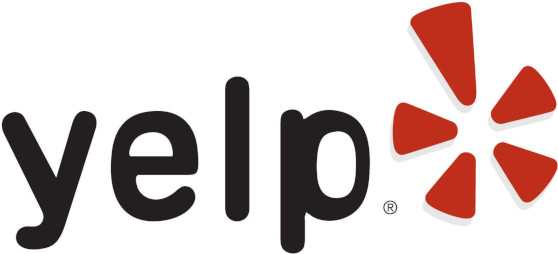

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [3]:
data = pd.read_csv("yelp_business.csv")
data.head(10)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,1,Italian;Restaurants
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,1,Automotive;Auto Detailing


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [4]:
data["company_count"] = 1
data.groupby("city").count().sort_values("company_count").tail(5)["company_count"]

city
Scottsdale     8228
Charlotte      8553
Toronto       17206
Phoenix       17213
Las Vegas     26775
Name: company_count, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [5]:
# Оставляем информацию только о городе Лас-Вегас.
las_vegas = data[data["city"] == "Las Vegas"]

In [6]:
# Устанавливаем стиль для красоты.
sns.set(style="whitegrid")

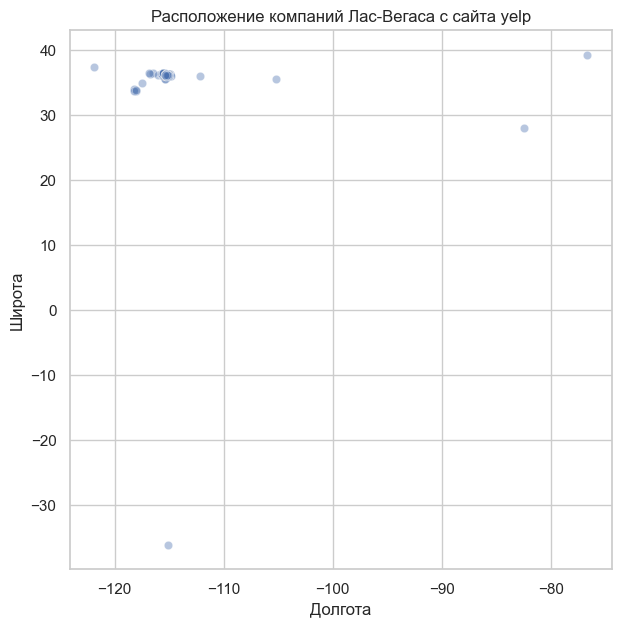

In [7]:
plt.figure(figsize=(7, 7))

plt.title("Расположение компаний Лас-Вегаса с сайта yelp")
sns.scatterplot(data=las_vegas, x="longitude", y="latitude", alpha=0.4).set(
    xlabel="Долгота", ylabel="Широта"
)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

In [8]:
# Подбор границ.
left_longitude = -115.35
right_longitude = -115
left_latitude = 35.95
right_latitude = 36.35

las_vegas = las_vegas[
    (left_longitude <= las_vegas["longitude"])
    & (las_vegas["longitude"] <= right_longitude)
    & (left_latitude <= las_vegas["latitude"])
    & (las_vegas["latitude"] <= right_latitude)
]

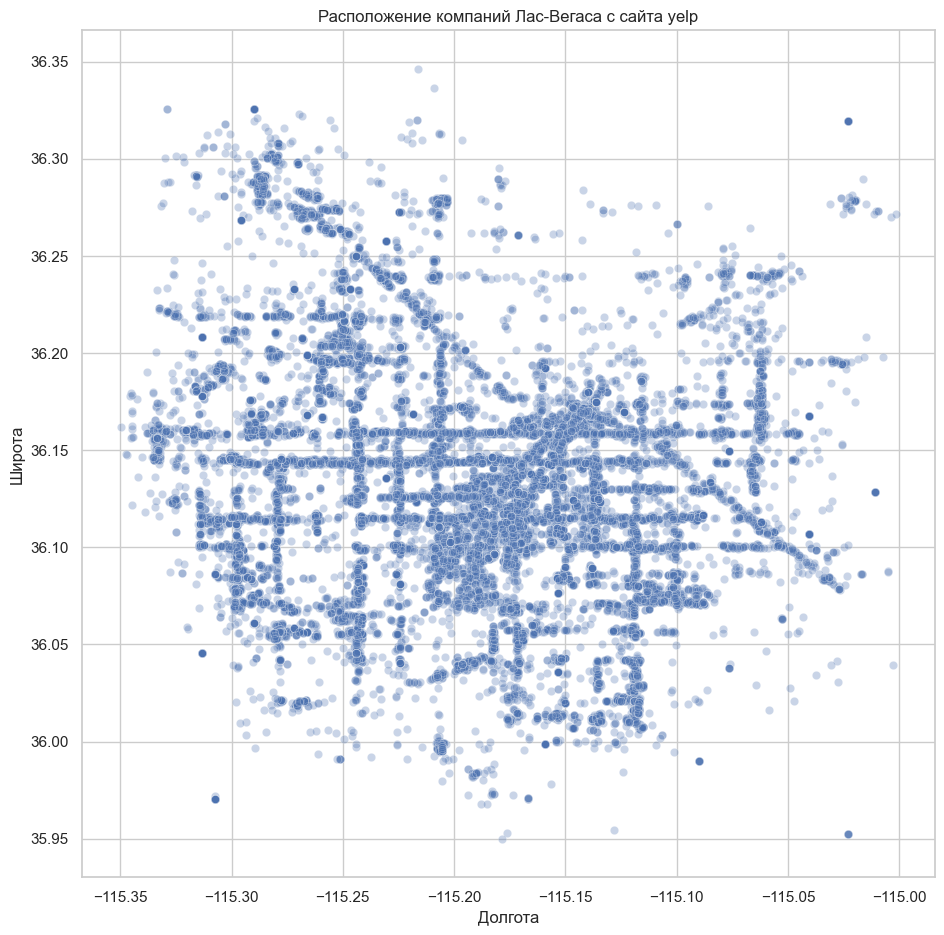

In [9]:
plt.figure(figsize=(11, 11))

plt.title("Расположение компаний Лас-Вегаса с сайта yelp")
sns.scatterplot(data=las_vegas, x="longitude", y="latitude", alpha=0.3).set(
    xlabel="Долгота", ylabel="Широта"
)
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [10]:
import folium as fm

las_vegas_cord = [36.175, -115.137]
latitudes = las_vegas["latitude"]
longitudes = las_vegas["longitude"]

In [11]:
map = fm.Map(location=las_vegas_cord, zoom_start=12)

for latitude, longitude in zip(latitudes, longitudes):
    fm.CircleMarker(location=[latitude, longitude], radius=1, fill_opacity=0.9).add_to(
        map
    )

map.save("map1.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [12]:
review = pd.read_csv("yelp_review.csv")
review

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [13]:
review = review.set_index("business_id")
review_las_vegas = review.loc[las_vegas["business_id"]].reset_index()

Удалим ненужные столбцы.

In [14]:
review_las_vegas = review_las_vegas.drop("Unnamed: 0", axis=1)
las_vegas = las_vegas.drop("Unnamed: 0", axis=1)

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [15]:
review_las_vegas = review_las_vegas.groupby("business_id").aggregate(["mean", "size"])
review_las_vegas

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[26568 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [16]:
new_columns = ["Средняя оценка", "Количество отзывов"]
review_las_vegas.columns = new_columns
review_las_vegas

,Средняя оценка,Количество отзывов
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [17]:
las_vegas = las_vegas.set_index("business_id")

# Оставляем только нужные колонки.
tmp_las_vegas = las_vegas[["latitude", "longitude", "categories", "name"]]

yelp_analize = review_las_vegas.join(other=tmp_las_vegas)
yelp_analize

,Средняя оценка,Количество отзывов,latitude,longitude,categories,name
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse"""
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,36.114277,-115.170975,Arts & Entertainment;Festivals,"""World Food Championships"""
--WsruI0IGEoeRmkErU5Gg,4.928571,14,36.130899,-115.190785,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning"""
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration"""
--e8PjCNhEz32pprnPhCwQ,3.473684,19,36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique"""
...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub"""
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans"""
zzjqFOujmM9surbMANZ_ag,5.000000,3,36.129838,-115.146037,Nightlife;Lounges;Bars,"""American Express Open Business Lounge"""


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

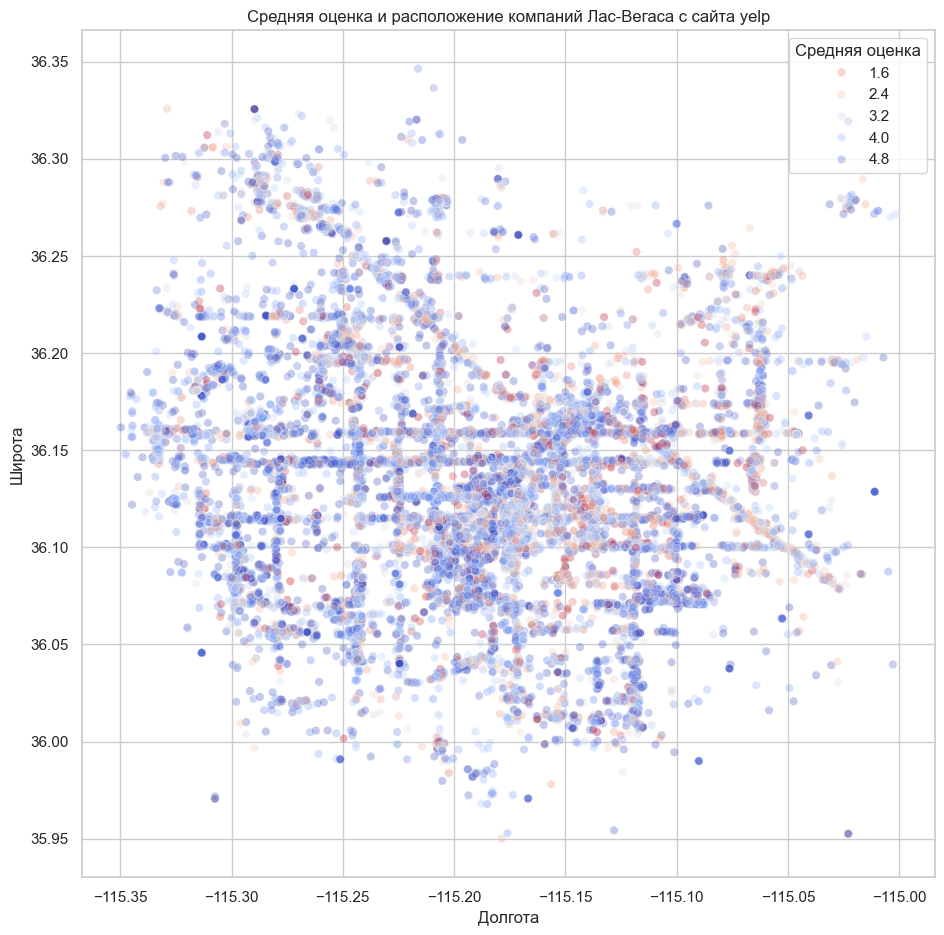

In [18]:
plt.figure(figsize=(11, 11))

plt.title("Средняя оценка и расположение компаний Лас-Вегаса с сайта yelp")
sns.scatterplot(
    data=yelp_analize,
    x="longitude",
    y="latitude",
    hue="Средняя оценка",
    alpha=0.3,
    palette="coolwarm_r",
).set(xlabel="Долгота", ylabel="Широта")

plt.legend(loc="upper right", title="Средняя оценка")
plt.show()


Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [19]:
# Создадим копию.
copy_yelp_data = yelp_analize.copy()

In [20]:
yelp_analize["latitude"] = np.round(yelp_analize["latitude"] * 4, decimals=1) * 0.25
yelp_analize["longitude"] = np.round(yelp_analize["longitude"] * 4, decimals=1) * 0.25

Также добавим колонку "Количество компаний в районе", нам это понадобится.

In [21]:
yelp_analize["Количество компании на районе"] = yelp_analize.groupby(
    ["latitude", "longitude"]
)["name"].transform("count")

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

Если наша цель - выяснить наилучший район, то первый подход кажется здесь более уместным, так как при этом подходе учитывается то, что магазины находятся в этом районе. \
Второй метод считает среднее качество компаний в районе, что не очень подходит к нашим целям. Всё же второй метод не учитывает, что качество услуг может значительно различаться в разных районах.

In [22]:
# Подготовка данных для графика.
table_for_graph = yelp_analize.pivot_table(
    index="latitude", columns="longitude", values="Средняя оценка", aggfunc="mean"
).copy()

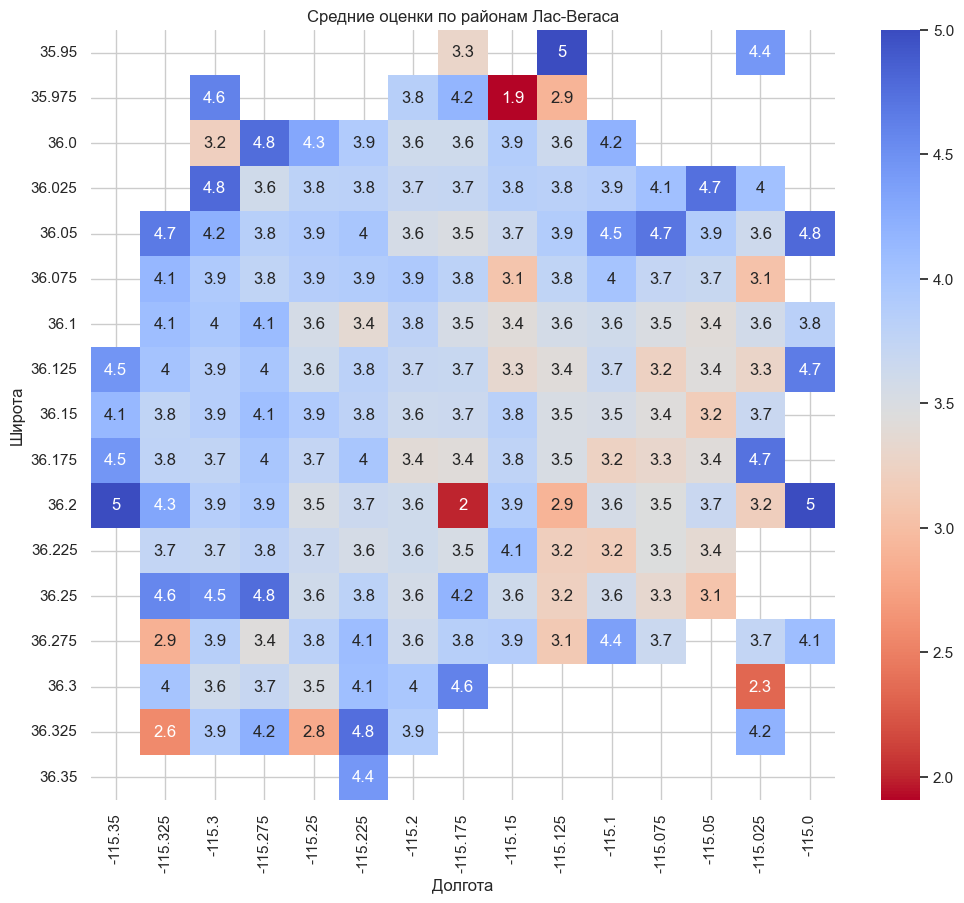

In [23]:
plt.figure(figsize=(12, 10))

sns.heatmap(table_for_graph, cmap="coolwarm_r", annot=True).set(
    ylabel="Широта", xlabel="Долгота", title="Средние оценки по районам Лас-Вегаса"
)
plt.yticks(rotation=360)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых, на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:**

Во-первых, не очень правильно судить о районе, если в нем мало компаний.
* В силу того, что компаний очень мало, одно или несколько плохих заведений могут испортить среднюю оценку всему району или же противоположная ситуация, когда в районе почти все заведения хороши, кроме нескольких, которые сильно портят среднюю оценку района. "Я ем капусту, а мой сосед ест мясо - в среднем мы оба едим голубцы".

Во-вторых, на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.
* В подстроивании нет ничего плохого, но есть большие проблемы в том, что мы берем минимум и максимум. Дело в том, что на карте почти все районы с большим количеством оценок имеют оценки в диапазоне от 3.3 до 4. Из-за граничных районов, где очень мало оценок, и при этом оценки около 4-5, получается, что все центральные районы закрашиваются в один цвет, что сильно мешает восприятию графика.
* Было бы логичнее сделать такую цветовую гамму, а все остальные можно было не учитывать или же сделать так, чтобы за этим диапазоном цветовая гамма не так сильно менялась, как в самом диапазоне.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [24]:
central_districts = yelp_analize[yelp_analize["Количество компании на районе"] >= 30].copy()

central_districts_table = central_districts.pivot_table(
    index="latitude", columns="longitude", values="Средняя оценка", aggfunc="mean"
)

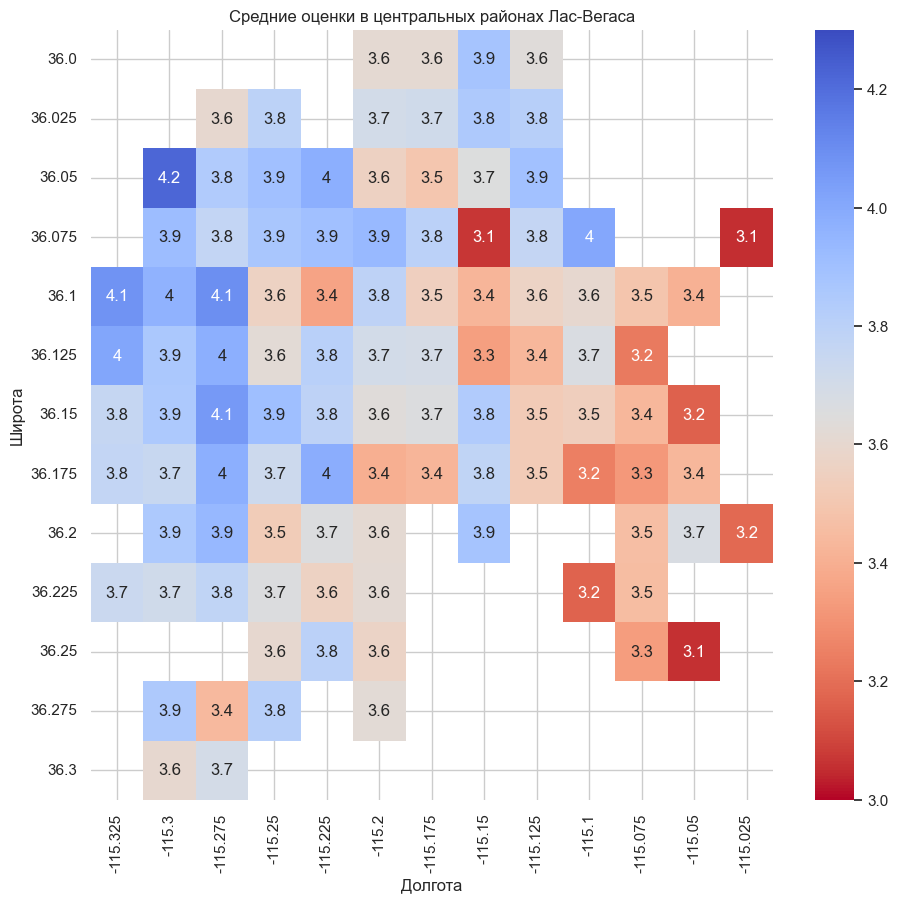

In [25]:
plt.figure(figsize=(11, 10))

sns.heatmap(
    central_districts_table, cmap="coolwarm_r", annot=True, vmin=3.0, vmax=4.3
).set(
    ylabel="Широта",
    xlabel="Долгота",
    title="Средние оценки в центральных районах Лас-Вегаса",
)
plt.yticks(rotation=360)
plt.show()


Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**
* В этом графике уже можно утверждать, что районы с хорошими оценками действительно имеют хорошую репутацию, но думаю, не плохо было бы найти среднее отклонение от этих значений. Однако, уже график стал более надежным источником информации.
* Тут уже можно разглядеть "структуру центральных районов", но все же кажется, что 30 оценок слишком мало, так как на краях все еще очень много "выбросов".
* Но хоть какие-то выводы уже можно сделать, к примеру, похоже, что на северо-востоке районы будут получше, чем в других районах.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

Сначала построим такую таблицу.

In [26]:
# Берем только те рестораны, у которых больше 5 отзывов.
first_filtr = yelp_analize[yelp_analize["Количество отзывов"] >= 5].copy()

# Только строки, содержащие слово "restaurant" в качестве подстроки без учета регистра, подлежат выборке.
second_filtr = first_filtr[
    first_filtr["categories"].str.lower().str.contains("restaurant")
]

In [27]:
# Отбрасываем ненужные столбцы.
third_filtr = second_filtr[
    ["latitude", "longitude", "Средняя оценка", "Количество отзывов", "Количество компании на районе"]
]

# Отбрасываем районы, в которых количество ресторанов с не менее 5 отзывами меньше 10.
fourth_filtr = third_filtr[third_filtr["Количество компании на районе"] >= 10]

# Отбрасываем ненужные столбцы.
fifth_filtr = fourth_filtr[["Средняя оценка", "latitude", "longitude"]]

# Вычисляем средние значения по району.
data_for_graph = fifth_filtr.pivot_table(
    index="latitude", columns="longitude", values="Средняя оценка", aggfunc="mean"
)

Теперь построим график по таблице.

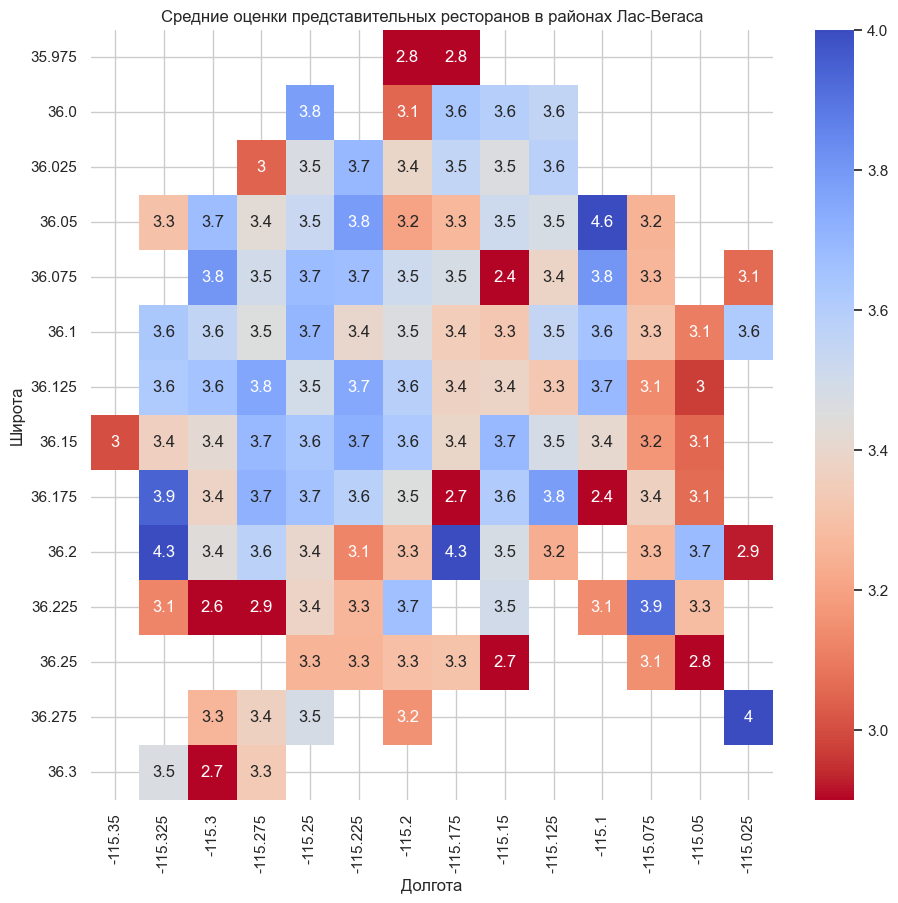

In [28]:
plt.figure(figsize=(11, 10))

sns.heatmap(data_for_graph, cmap="coolwarm_r", annot=True, vmin=2.9, vmax=4).set(
    ylabel="Широта",
    xlabel="Долгота",
    title="Средние оценки представительных ресторанов в районах Лас-Вегаса",
)
plt.yticks(rotation=360)
plt.show()

Оценим, на сколько этот метод повлиал на результаты.

In [29]:
# Оценка качества.
def info_about_data(data):
    std_las_vegas = data.std()["Средняя оценка"]

    print(
        f"Среднее отклонение от средной оценки ресторанов по всему городу: {std_las_vegas :.2}"
    )

Построим такую же таблицу, но без ограничений.

In [30]:
# Только строки, содержащие слово "restaurant" в качестве подстроки без учета регистра, подлежат выборке.
simple_data_about_restaurant = yelp_analize[
    yelp_analize["categories"].str.lower().str.contains("restaurant")
].copy()

# Отбрасываем ненужные столбцы.
simple_data_about_restaurant = second_filtr[
    ["latitude", "longitude", "Средняя оценка"]
]

# Вычисляем средние значения по району.
data_for_graph_simple = simple_data_about_restaurant.pivot_table(
    index="latitude", columns="longitude", values="Средняя оценка", aggfunc="mean"
)

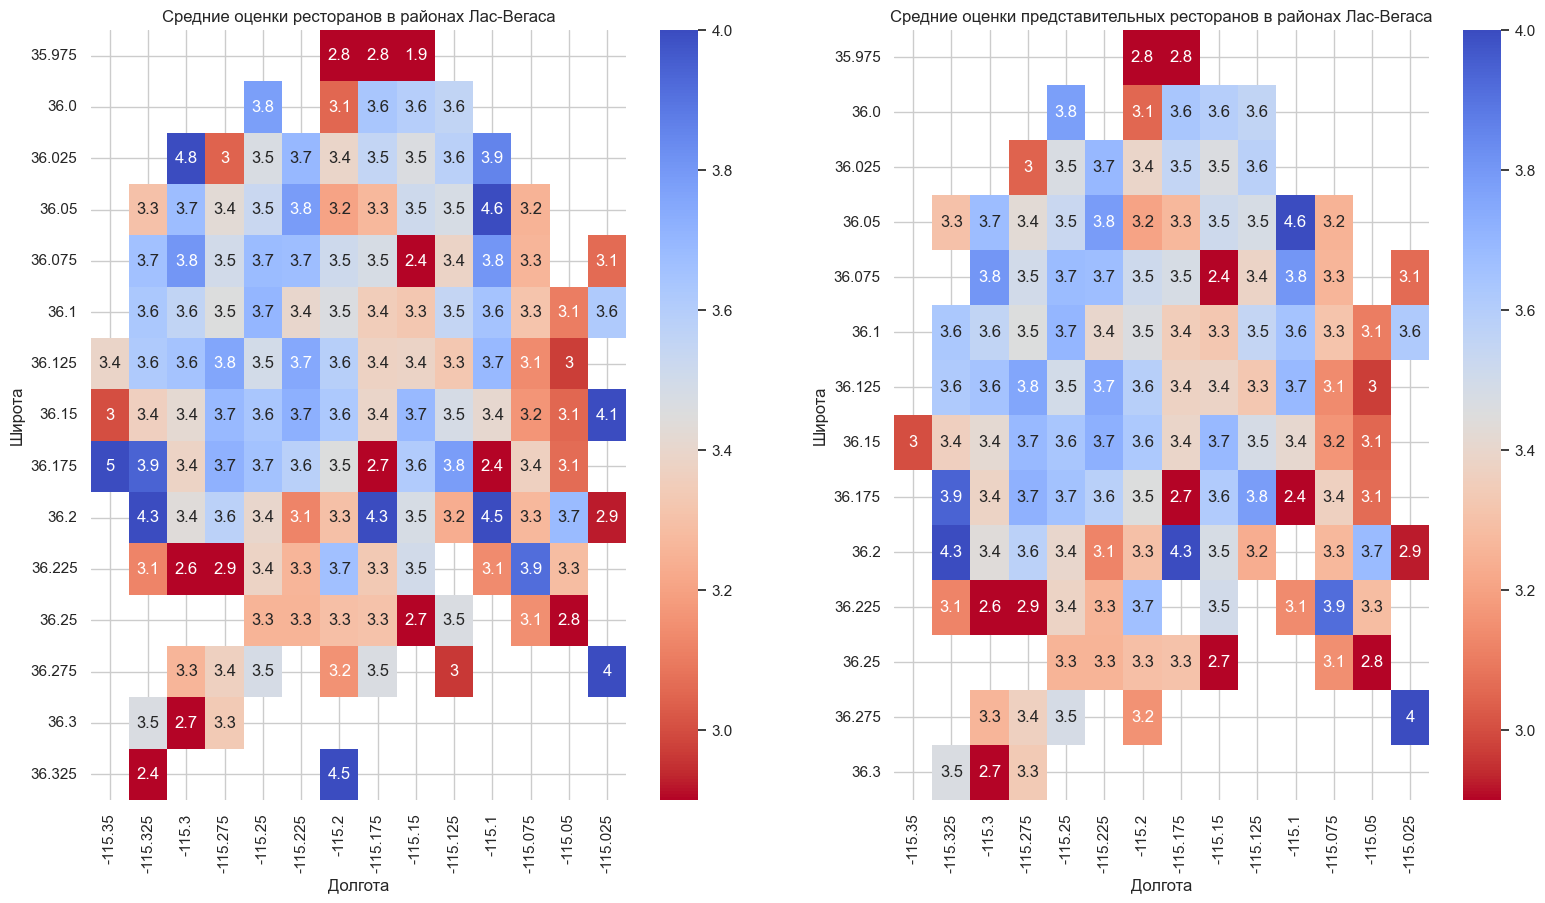

In [31]:
# Строим график.
plt.figure(figsize=(19, 10))

# Первый график.
plt.subplot(1, 2, 1)
sns.heatmap(data_for_graph_simple, cmap="coolwarm_r", annot=True, vmin=2.9, vmax=4).set(
    ylabel="Широта",
    xlabel="Долгота",
    title="Средние оценки ресторанов в районах Лас-Вегаса",
)
plt.yticks(rotation=360)


# Второй график.
plt.subplot(1, 2, 2)
sns.heatmap(data_for_graph, cmap="coolwarm_r", annot=True, vmin=2.9, vmax=4).set(
    ylabel="Широта",
    xlabel="Долгота",
    title="Средние оценки представительных ресторанов в районах Лас-Вегаса",
)
plt.yticks(rotation=360)

plt.show()

In [32]:
print("Выбираем без ограничений:")
info_about_data(simple_data_about_restaurant)

print("\nВыбираем c ограничениями:")
info_about_data(fifth_filtr)

Выбираем без ограничений:
Среднее отклонение от средной оценки ресторанов по всему городу: 0.77

Выбираем c ограничениями:
Среднее отклонение от средной оценки ресторанов по всему городу: 0.77


Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**

Тут видно, что среднее отклонение не изменилось. На графиках все выглядит одинаково. Думаю, это связано с тем, что требуемые нами ограничения слишком малы, то есть числа 10 или 5 слишком незначительны и почти не влияют на результат.

Но самая идея, думаю, правильная. Если присмотреться, видно, что некоторые районы были убраны таким образом. Такие районы, не столь важны, но они могли сильно влиять на результат.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [33]:
# Только строки, содержащие слово "restaurant" в качестве подстроки без учета регистра, подлежат выборке.
cat_Vasiliy_data = copy_yelp_data[
    copy_yelp_data["categories"].str.lower().str.contains("restaurant")
].copy()

# Для каждого из этих ресторанов должно быть не менее 50 отзывов.
cat_Vasiliy_data = cat_Vasiliy_data[cat_Vasiliy_data["Количество отзывов"] >= 50].copy()

# Отбрасываем ненужные столбцы.
cat_Vasiliy_data = cat_Vasiliy_data.reset_index()
cat_Vasiliy_data = cat_Vasiliy_data[
    [
        "name",
        "Средняя оценка",
        "Количество отзывов",
        "latitude",
        "longitude",
        "categories",
    ]
]

# Более читабельные названия.
cat_Vasiliy_data.columns = [
    "Название",
    "Средняя оценка",
    "Количество отзывов",
    "Широта",
    "Долгота",
    "Категории",
]

# Ответ.
cat_Vasiliy_data.sort_values("Средняя оценка", key=lambda x: -x).head(10)

,Название,Средняя оценка,Количество отзывов,Широта,Долгота,Категории
2092,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
766,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
2466,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
2170,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
904,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
2167,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
428,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
2208,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
2047,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...
2688,"""California Sushi Burrito""",4.807018,57,36.125636,-115.202487,Asian Fusion;Fast Food;Restaurants;Japanese;Po...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [34]:
# Только строки, содержащие слово "restaurant" в качестве подстроки без учета регистра, подлежат выборке.
best_restaurants_data = copy_yelp_data[
    copy_yelp_data["categories"].str.lower().str.contains("restaurant")
].copy()

# Рестораны со средней оценкой не менее 4.7, которая посчитана по не менее 50 отзывам.
best_restaurants_data = best_restaurants_data[
    (best_restaurants_data["Средняя оценка"] >= 4.7)
    & (best_restaurants_data["Количество отзывов"] >= 50)
]

# Сортируем в том же порядке, что и в прошлый раз.
best_restaurants_data = best_restaurants_data.sort_values(
    "Средняя оценка", key=lambda x: -x
)

Наносим на карту.

In [35]:
las_vegas_cord = [36.175, -115.137]

latitudes = best_restaurants_data["latitude"]
longitudes = best_restaurants_data["longitude"]

map = fm.Map(location=las_vegas_cord, zoom_start=11)

i = 0
for latitude, longitude in zip(latitudes, longitudes):
    if i < 10:
        fm.Marker(
            location=[latitude, longitude], popup=i, icon=fm.Icon(color="red")
        ).add_to(map)
    else:
        fm.CircleMarker(
            location=[latitude, longitude], radius=5, fill_opacity=1
        ).add_to(map)

    i += 1

map.save("map2.html")

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:**

Кот Василия имеет достаточно высокие требования к ресторанам, учитывая его ограничения. Поэтому с высокой вероятностью он посетит великолепный ресторан.

За исследование мы выяснили, что самый популярный город на площадке Yelp - Лас-Вегас.
* Мы построили несколько графиков, которые наглядно показывают плотность заведений Yelp в Лас-Вегасе. По этой карте можно определить будущие места для постройки бизнеса.
* Мы также построили карту с отмеченными на ней заведениями Yelp. Карта несет в себе большую информативность, чем плотностный график, из-за видимости различных сооружений.

Однако по графикам, составленным из точек, достаточно трудно делать выводы, поэтому мы перешли к разбивке города на районы.
* Однако восприятию таких данных мешали "выбросы". В целях минимизации этого момента мы построили несколько дополнительных графиков.
* По итогам можно утверждать, что районы на северо-востоке будут лучше, чем другие районы.


После мы перешли на анализ ресторанов.
* В целях ограничения влияния выбросов на результат, мы убрали краевые случаи из выборки.
* Но, к сожалению, похоже, что этого было недостаточно, так как разницы в отклонении между версией с ограничениями и версией без ограничений не было обнаружено.

Также для кота Василия мы отметили на карте топ-10 ресторанов по оценкам, учитывая, что отзывы писали не менее 50 человек, и так же нарисовали те рестораны, у которых больше 50 отзывов и оценка выше 4.7.